In [379]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import csv

%matplotlib inline

In [278]:
with open("boxofficemojo_final_dictionary.json", "rb") as json_file:
    main_dict = json.load(json_file)

In [279]:
#destroys main_dict so need to reload the above every time before running this
single_headers = ['title', 'runtime', 'rating', 'studio','opening date', 'opening gross', 'opening theaters', 
 'total gross', 'total theaters', 'boxofficemojo url']
genrelist = []
actorlist = []
singlevaluedict = {}
for title, movie in main_dict.iteritems():
    if 'genres' in movie: genrelist.append([title] + movie.pop('genres'))
    if 'actors' in movie: actorlist.append([title] + movie.pop('actors'))
    singlevaluedict.update({title: [movie.get(header,'unknown') for header in single_headers]})

##Genres

In [314]:
mylist=[]
for row in genrelist:
    for values in row:
        if row[0] != values:
            mylist.append([row[0], values])
genre_df = pd.DataFrame(mylist)
genre_df.columns = ['title', 'genre']
# genre_df['genre'].value_counts()

In [369]:
with open("violent_categories_revised.txt", "rb") as f:
    v_list = f.read().splitlines()

v_genres = [i.strip() for i in v_list]

violent_movies_by_genre = genre_df[(genre_df['genre'].isin(v_list))]
score_list = []
for item in genre_df['genre'].values.tolist():
    if item in v_genres:
        score_list.append(3)
    else:
        score_list.append(1)

genre_df['genre score'] = score_list
genre_df[(genre_df['title'] == 'Kick-Ass')]

,title,genre,genre score
14664,Kick-Ass,Action Heroine,3
14665,Kick-Ass,Comic Book Adaptation,3
14666,Kick-Ass,Controversy,1
14667,Kick-Ass,Superhero,3
14668,Kick-Ass,Superhero - Comedy,3
14669,Kick-Ass,Superhero - Origin,3
14670,Kick-Ass,Action Comedy,3


In [282]:
genre_scored_movies = genre_df.groupby('title').sum()
genre_scored_movies.sort('genre score', ascending=False)

,genre score
title,
Kick-Ass,19
Kill Bill Vol. 1,19
The Green Hornet,18
Kill Bill Vol. 2,18
Resident Evil: Retribution,17
Man of Steel,17
Resident Evil: Afterlife,17
Captain America: The First Avenger,16
Guardians of the Galaxy,16


##Rating

In [283]:
single_value_df = pd.DataFrame(singlevaluedict)
single_value_df = single_value_df.T
single_value_df.columns = single_headers
single_value_df['rating'].value_counts()

R                5501
Unrated          4244
PG-13            2673
PG               1983
Not Yet Rated     455
G                 439
NC-17              30
unknown            26
GP                 22
M/PG               11
M                   9
Unknown             4
n/a                 3
X                   2
dtype: int64

In [284]:
#get all the rows where rating column equals 'n/a'
single_value_df[(single_value_df['rating']=='n/a')]

,title,runtime,rating,studio,opening date,opening gross,opening theaters,total gross,total theaters,boxofficemojo url
I Don't Want to Be a Man,I Don't Want to Be a Man,n/a,n/a,N/A,1920,n/a,n/a,n/a,n/a,http://www.boxofficemojo.com/movies/?id=idon't...
Let's Get Harry,Let's Get Harry,n/a,n/a,TriS,10/31/1986,n/a,n/a,"$140,980",n/a,http://www.boxofficemojo.com/movies/?id=let'sg...
The Miracle of Morgan's Creek,The Miracle of Morgan's Creek,n/a,n/a,Par.,1/19/1944,n/a,n/a,n/a,n/a,http://www.boxofficemojo.com/movies/?id=miracl...


In [285]:
rating_scores = {}
with open("ratings_rated.txt", "rb") as f:
    for i in f:
        rating_scores.update(eval(i))

#add the score column with scores
rating_score_list = []
for item in single_value_df['rating'].values.tolist():
    rating_score_list.append(rating_scores[item])
rating_scored_movies = single_value_df.copy()
rating_scored_movies['rating score'] = rating_score_list
rating_scored_movies.sort('rating score', ascending=False)

,title,runtime,rating,studio,opening date,opening gross,opening theaters,total gross,total theaters,boxofficemojo url,rating score
Poison,Poison,1 hrs. 25 min.,NC-17,Zeit.,4/5/1991,n/a,n/a,"$787,280",n/a,http://www.boxofficemojo.com/movies/?id=poison...,7
Wide Sargasso Sea,Wide Sargasso Sea,1 hrs. 39 min.,NC-17,NL,4/16/1993,"$33,806",1,"$1,614,784",1,http://www.boxofficemojo.com/movies/?id=widesa...,7
Young Adam,Young Adam,1 hrs. 33 min.,NC-17,SPC,4/16/2004,"$50,278",9,"$767,373",41,http://www.boxofficemojo.com/movies/?id=younga...,7
Henry & June,Henry & June,2 hrs. 17 min.,NC-17,Uni.,10/5/1990,"$1,032,942",76,"$11,567,449",295,http://www.boxofficemojo.com/movies/?id=henrya...,7
Last Tango in Paris,Last Tango in Paris,2 hrs. 9 min.,X,UA,1/27/1973,n/a,n/a,"$36,144,000",n/a,http://www.boxofficemojo.com/movies/?id=lastta...,7
Shame,Shame,1 hrs. 39 min.,NC-17,FoxS,12/2/2011,"$349,519",10,"$3,909,002",95,http://www.boxofficemojo.com/movies/?id=shame.htm,7
Orgazmo,Orgazmo,1 hrs. 34 min.,NC-17,Oct.,10/23/1998,"$210,073",94,"$602,302",94,http://www.boxofficemojo.com/movies/?id=orgazm...,7
"The Cook, The Thief, His Wife and Her Lover","The Cook, The Thief, His Wife and Her Lover",2 hrs. 4 min.,NC-17,Mira.,4/6/1990,"$252,223",16,"$7,724,701",239,http://www.boxofficemojo.com/movies/?id=cookth...,7
Tie Me Up! Tie Me Down!,Tie Me Up! Tie Me Down!,1 hrs. 41 min.,NC-17,Mira.,5/4/1990,"$65,299",2,"$4,087,361",82,http://www.boxofficemojo.com/movies/?id=tiemeu...,7
Blue Is the Warmest Color,Blue Is the Warmest Color,2 hrs. 59 min.,NC-17,IFC,10/25/2013,"$100,316",4,"$2,199,787",142,http://www.boxofficemojo.com/movies/?id=bluewa...,7


##Body Count

In [320]:
with open("moviebodycounts_final_movie_data_second_clean.json", "rb") as json_file:
    body_count_dict = json.load(json_file)

In [321]:
body_count_df = pd.DataFrame(body_count_dict)
body_count_df = body_count_df.T.convert_objects(convert_numeric=True)
body_count_df.sort('body count', ascending=False)

,body count,director,url
The Lord of the Rings: The Return of the King,836,Peter Jackson,http://moviebodycounts.com/LotR_Return_ot_King...
Kingdom of Heaven,610,Ridley Scott,http://moviebodycounts.com/Kingdom_of_Heaven.htm
300,600,Zack Snyder,http://moviebodycounts.com/300.htm
Troy,572,Wolfgang Petersen,http://moviebodycounts.com/Troy.htm
The Last Samurai,558,Edward Zwick,http://moviebodycounts.com/Last_Samurai.htm
The Lord of the Rings: The Two Towers,468,Peter Jackson,http://moviebodycounts.com/LotR_Two_Towers.htm
Windtalkers,389,NaN,NaN
King Arthur,378,NaN,NaN
The Big Red One,338,NaN,NaN
In the Name of the King: A Dungeon Siege Tale,329,NaN,NaN


In [329]:
body_count_score_list = []
for item in single_value_df['title'].values.tolist():
    if item in body_count_dict:
        body_count_score_list.append(int(body_count_dict[item]['body count']))
    else:
        body_count_score_list.append(1)
body_count_scored_movies = single_value_df.copy()
body_count_scored_movies['body count score'] = body_count_score_list
body_count_scored_movies.sort('body count score', ascending=False)

,title,runtime,rating,studio,opening date,opening gross,opening theaters,total gross,total theaters,boxofficemojo url,body count score
The Lord of the Rings: The Return of the King,The Lord of the Rings: The Return of the King,3 hrs. 20 min.,PG-13,NL,12/17/2003,"$72,629,713","3,703","$377,027,325*","3,703",http://www.boxofficemojo.com/movies/?id=return...,836
Kingdom of Heaven,Kingdom of Heaven,2 hrs. 25 min.,R,Fox,5/6/2005,"$19,635,996","3,216","$47,398,413","3,219",http://www.boxofficemojo.com/movies/?id=kingdo...,610
300,300,1 hrs. 57 min.,R,WB,3/9/2007,"$70,885,301","3,103","$210,614,939","3,280",http://www.boxofficemojo.com/movies/?id=300.htm,600
Troy,Troy,2 hrs. 43 min.,R,WB,5/14/2004,"$46,865,412","3,411","$133,378,256","3,411",http://www.boxofficemojo.com/movies/?id=troy.htm,572
The Last Samurai,The Last Samurai,2 hrs. 34 min.,R,WB,12/5/2003,"$24,271,354","2,908","$111,127,263","2,938",http://www.boxofficemojo.com/movies/?id=lastsa...,558
The Lord of the Rings: The Two Towers,The Lord of the Rings: The Two Towers,2 hrs. 59 min.,PG-13,NL,12/18/2002,"$62,007,528","3,622","$339,789,881*","3,622",http://www.boxofficemojo.com/movies/?id=twotow...,468
Windtalkers,Windtalkers,2 hrs. 14 min.,R,MGM,6/14/2002,"$14,520,412","2,898","$40,914,068","2,898",http://www.boxofficemojo.com/movies/?id=windta...,389
King Arthur,King Arthur,2 hrs. 10 min.,PG-13,BV,7/7/2004,"$15,193,907","3,086","$51,882,244","3,086",http://www.boxofficemojo.com/movies/?id=kingar...,378
The Big Red One,The Big Red One,1 hrs. 13 min.,PG,MGM,7/18/1980,n/a,n/a,"$7,206,220",n/a,http://www.boxofficemojo.com/movies/?id=bigred...,338
In the Name of the King: A Dungeon Siege Tale,In the Name of the King: A Dungeon Siege Tale,2 hrs. 4 min.,PG-13,Free,1/11/2008,"$2,984,524","1,632","$4,775,656","1,632",http://www.boxofficemojo.com/movies/?id=inthen...,329


##Total Index

In [419]:
total_index = single_value_df.copy()
total_index['genre score'] = genre_scored_movies['genre score']
total_index['normalized genre score'] = genre_scored_movies['genre score'].div(19)
# total_index.sort('normalized genre score', ascending=False)
total_index['rating score'] = rating_scored_movies['rating score']
total_index['normalized rating score'] = rating_scored_movies['rating score'].div(7)
# body_count_scored_movies['body count score'].convert_objects(convert_numeric=True)
total_index['body count score'] = body_count_scored_movies['body count score']
total_index['normalized body count score'] =  body_count_scored_movies['body count score'].div(1000)
total_index['violence index'] = total_index['normalized genre score'] * total_index['normalized rating score'] * total_index['normalized body count score']
total_index.sort('violence index', ascending=False)

,title,runtime,rating,studio,opening date,opening gross,opening theaters,total gross,total theaters,boxofficemojo url,genre score,normalized genre score,rating score,normalized rating score,body count score,normalized body count score,violence index
300,300,1 hrs. 57 min.,R,WB,3/9/2007,"$70,885,301","3,103","$210,614,939","3,280",http://www.boxofficemojo.com/movies/?id=300.htm,7,0.368421,5,0.714286,600,0.600,0.157895
The Last Samurai,The Last Samurai,2 hrs. 34 min.,R,WB,12/5/2003,"$24,271,354","2,908","$111,127,263","2,938",http://www.boxofficemojo.com/movies/?id=lastsa...,7,0.368421,5,0.714286,558,0.558,0.146842
Windtalkers,Windtalkers,2 hrs. 14 min.,R,MGM,6/14/2002,"$14,520,412","2,898","$40,914,068","2,898",http://www.boxofficemojo.com/movies/?id=windta...,7,0.368421,5,0.714286,389,0.389,0.102368
The Lord of the Rings: The Return of the King,The Lord of the Rings: The Return of the King,3 hrs. 20 min.,PG-13,NL,12/17/2003,"$72,629,713","3,703","$377,027,325*","3,703",http://www.boxofficemojo.com/movies/?id=return...,5,0.263158,3,0.428571,836,0.836,0.094286
Kingdom of Heaven,Kingdom of Heaven,2 hrs. 25 min.,R,Fox,5/6/2005,"$19,635,996","3,216","$47,398,413","3,219",http://www.boxofficemojo.com/movies/?id=kingdo...,4,0.210526,5,0.714286,610,0.610,0.091729
Blade: Trinity,Blade: Trinity,1 hrs. 54 min.,R,NL,12/8/2004,"$16,061,271","2,912","$52,411,906","2,912",http://www.boxofficemojo.com/movies/?id=blade3...,15,0.789474,5,0.714286,140,0.140,0.078947
Resident Evil: Extinction,Resident Evil: Extinction,1 hrs. 35 min.,R,SGem,9/21/2007,"$23,678,580","2,828","$50,648,679","2,848",http://www.boxofficemojo.com/movies/?id=reside...,15,0.789474,5,0.714286,124,0.124,0.069925
Resident Evil: Apocalypse,Resident Evil: Apocalypse,1 hrs. 34 min.,R,SGem,9/10/2004,"$23,036,273","3,284","$51,201,453","3,284",http://www.boxofficemojo.com/movies/?id=reside...,15,0.789474,5,0.714286,123,0.123,0.069361
Kill Bill Vol. 1,Kill Bill Vol. 1,1 hrs. 50 min.,R,Mira.,10/10/2003,"$22,089,322","3,102","$70,099,045","3,102",http://www.boxofficemojo.com/movies/?id=killbi...,19,1.000000,5,0.714286,95,0.095,0.067857
Saving Private Ryan,Saving Private Ryan,2 hrs. 50 min.,R,DW,7/24/1998,"$30,576,104","2,463","$216,540,909","2,807",http://www.boxofficemojo.com/movies/?id=saving...,7,0.368421,5,0.714286,255,0.255,0.067105


##Chicago is a wasteland

In [343]:
crime_df = pd.DataFrame.from_csv('Crimes_-_2001_to_present.csv', infer_datetime_format=True)
crime_df

,Date,Primary Type
ID,,
10028048,04/10/2015 11:45:00 PM,BATTERY
10028038,04/10/2015 11:40:00 PM,BATTERY
10028104,04/10/2015 11:38:00 PM,ASSAULT
10028046,04/10/2015 11:35:00 PM,ASSAULT
10028704,04/10/2015 11:30:00 PM,ASSAULT
21814,04/10/2015 11:16:00 PM,HOMICIDE
10028822,04/10/2015 11:05:00 PM,BATTERY
10028083,04/10/2015 11:00:00 PM,BATTERY
10028022,04/10/2015 11:00:00 PM,BATTERY


In [388]:
crime_df['day'] = pd.to_datetime(crime_df['Date'], format="%m/%d/%Y", exact=False)

In [389]:
crime_df

,Date,Primary Type,day
ID,,,
10028048,04/10/2015 11:45:00 PM,BATTERY,2015-04-10
10028038,04/10/2015 11:40:00 PM,BATTERY,2015-04-10
10028104,04/10/2015 11:38:00 PM,ASSAULT,2015-04-10
10028046,04/10/2015 11:35:00 PM,ASSAULT,2015-04-10
10028704,04/10/2015 11:30:00 PM,ASSAULT,2015-04-10
21814,04/10/2015 11:16:00 PM,HOMICIDE,2015-04-10
10028822,04/10/2015 11:05:00 PM,BATTERY,2015-04-10
10028083,04/10/2015 11:00:00 PM,BATTERY,2015-04-10
10028022,04/10/2015 11:00:00 PM,BATTERY,2015-04-10


In [394]:
v_crimes_per_day = crime_df.groupby('day').count()
v_crimes_per_day = v_crimes_per_day.reset_index()

In [371]:
crime_df.dtypes

Date                    object
Primary Type            object
day             datetime64[ns]
dtype: object

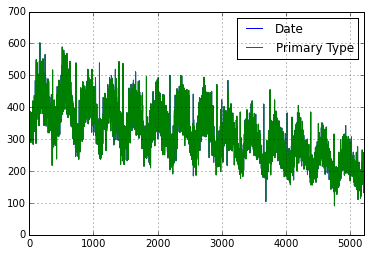

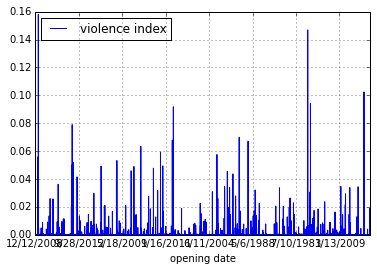

In [445]:
ax = v_crimes_per_day.plot()
# plt.plot(v_crimes_per_day['day'], v_crimes_per_day['Date'])
# total_index['opening date'] = pd.to_datetime(total_index['opening date'])
# total_index.dtypes
# total_index.plot()
total_index_graph = total_index.copy()
# total_index_graph[(total_index_graph['opening date'] > '1/1/1980')].sort('opening date')
total_index_graph[['opening date', 'violence index']].plot(x='opening date')

In [455]:
new_graph = pd.concat([v_crimes_per_day['Date'], v_crimes_per_day['day'], total_index['opening date'], total_index['violence index']], axis=1)
new_graph

,Date,day,opening date,violence index
0,448,2001-01-01,NaN,NaN
1,247,2001-01-02,NaN,NaN
2,302,2001-01-03,NaN,NaN
3,290,2001-01-04,NaN,NaN
4,308,2001-01-05,NaN,NaN
5,365,2001-01-06,NaN,NaN
6,323,2001-01-07,NaN,NaN
7,306,2001-01-08,NaN,NaN
8,318,2001-01-09,NaN,NaN
9,334,2001-01-10,NaN,NaN
